In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#sources:
#https://www.kaggle.com/headsortails/explorations-of-action-moa-eda
#https://www.kaggle.com/isaienkov/mechanisms-of-action-moa-prediction-eda

In [2]:
df_train = pd.read_csv('lish-moa/train_features.csv')
df_test = pd.read_csv('lish-moa/test_features.csv')
df_ss = pd.read_csv('lish-moa/sample_submission.csv')
df_ts = pd.read_csv('lish-moa/train_targets_scored.csv')
df_tns = pd.read_csv('lish-moa/train_targets_nonscored.csv')

# Interactions within sets of features


## Cell Viability features(which starts from c-)
 <span style="color:#000000; font-family: 'Georgia'; font-size: 1.2em;">
As you can see cell viability features are highly correlated, while gene expressions are less correlated. So let's try to use some dimensionality reduction method like PCA </span>

In [3]:
cell_viab = df_train.loc[:, 'c-0':'c-99']

In [4]:
corr = cell_viab.corr()
corr.style.background_gradient(cmap='coolwarm')

In [5]:
#remove outliers
#cell_max = cell_viab.quantile(0.95)
#for i in cell_viab:
    
#    cell_viab.loc[cell_viab[i] > cell_max[i], i] = cell_max[i]        

## Gene expression features(which starts from g-)

In [6]:
gene_expr = df_train.loc[:, 'g-0':'g-99']
corr = gene_expr.corr()
corr.style.background_gradient(cmap = 'coolwarm')

## Target VS feature correaltion

In [7]:
target = df_ts.drop(columns = ['sig_id'])
features = df_train.loc[:, 'g-0': 'c-99']
target_features_corr = pd.concat([features, target], axis=1).corr().filter(target.columns).filter(features.columns, axis=0)

In [8]:
target_features_corr.head()

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
g-0,-0.008317,-0.011513,0.003049,-0.019100,-0.034001,-0.009239,-0.019205,-0.011048,-0.008982,-0.028803,...,-0.005502,-0.005343,-0.011480,-0.035796,-0.011603,-0.005810,0.008336,-0.006992,-0.004046,-0.006481
g-1,-0.004291,-0.004084,-0.000265,-0.005629,0.004920,0.009246,-0.003603,0.006332,-0.001601,0.012687,...,-0.005564,0.009758,0.000162,-0.003212,0.005468,-0.002795,-0.007093,-0.001118,-0.000202,0.000681
g-2,0.000719,-0.002585,-0.004516,-0.004385,-0.016947,0.002133,-0.002664,-0.009920,0.003295,-0.008364,...,0.006100,0.003845,0.007066,0.002302,0.012868,0.003467,0.000210,-0.002793,0.015729,0.002028
g-3,-0.008268,-0.002384,0.001146,-0.007750,-0.010446,-0.013589,-0.002952,-0.002539,0.006999,-0.012385,...,0.014440,-0.012509,-0.014529,-0.006532,-0.000278,-0.000885,0.003360,-0.001645,-0.005706,-0.001866
g-4,-0.003799,0.002661,0.006287,-0.010288,-0.010128,-0.009890,-0.007749,-0.003269,-0.004590,-0.006856,...,-0.000343,-0.000934,-0.008336,-0.022563,-0.002673,0.000025,-0.007507,0.002381,-0.000472,0.003345


# PCA

## gene experssion

In [9]:
#try:
#    train_noId = df_train.drop(columns = ['sig_id'])
#except KeyError:
#    pass

In [10]:
from sklearn.decomposition import PCA
from sklearn import preprocessing as prep
gene_expr = df_train.loc[:,'g-0':'g-771']
scaler = prep.StandardScaler()
scaled_gene = scaler.fit_transform(gene_expr)
pca = PCA()
pca.fit(scaled_gene)
pca_data = pca.transform(scaled_gene)

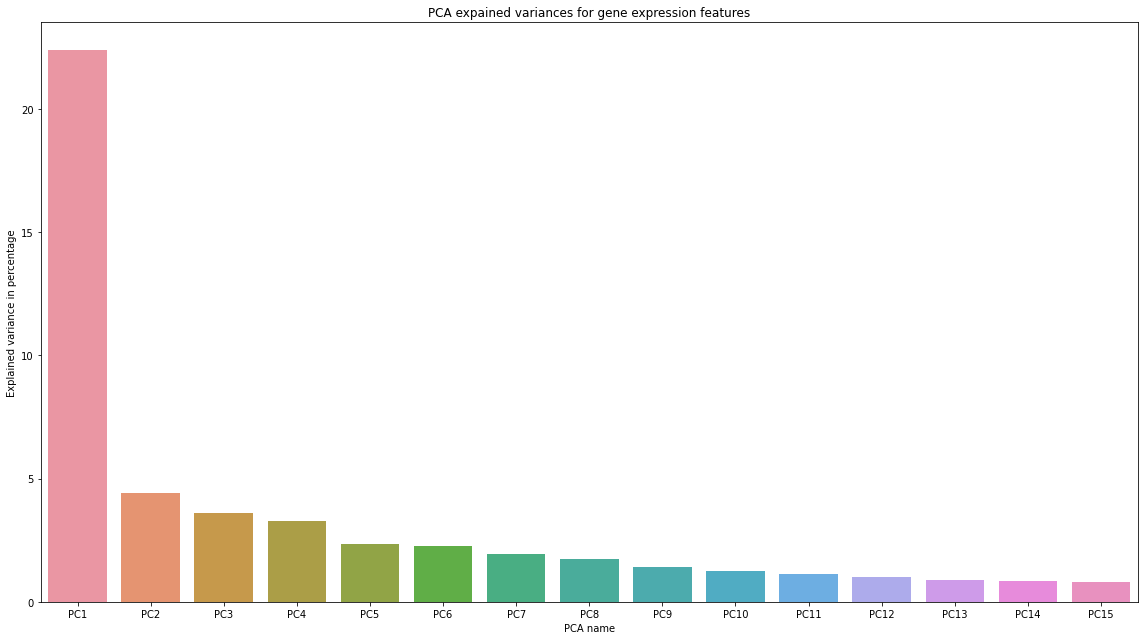

In [11]:
fig, ax = plt.subplots(figsize = (16,9))
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 2)
per_var_part = per_var[:15]
labels = ['PC' + str(x) for x in range(1, len(per_var_part) + 1)]
my_dict = dict()
for inx, i in enumerate(labels):
    my_dict[i] = per_var_part[inx]
df = pd.DataFrame(my_dict, index = [0])    
sns.barplot(data = df, tick_label = labels,ax = ax)
ax.set_title('PCA expained variances for gene expression features')
ax.set_ylabel('Explained variance in percentage')
ax.set_xlabel('PCA name')
plt.tight_layout()

In [12]:
loadings = pca.components_
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
pca_df = pd.DataFrame(loadings,index = gene_expr.columns, columns = labels)

In [13]:
pca_df.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC763,PC764,PC765,PC766,PC767,PC768,PC769,PC770,PC771,PC772
g-0,0.055668,-0.000839,0.014556,0.009571,0.031433,-0.014297,0.010328,-0.048872,-0.052175,-0.039966,...,0.009057,-0.008685,0.055295,0.038351,-0.036116,-0.001486,0.039689,-0.007599,-0.052427,0.047129
g-1,0.012865,-0.011562,0.003683,-0.049627,0.038506,-0.010752,0.049892,0.049729,-0.050153,-0.005082,...,0.013511,-0.076166,-0.009444,0.011474,0.012788,0.081294,-0.017747,-0.017155,0.000832,0.010219


In [14]:
loading_scores = pd.Series(loadings[0], index = gene_expr.columns)
sorted_scores = loading_scores.abs().sort_values(ascending = False)
top_10_genes = sorted_scores[0:15].index.values
top_10_genes

array(['g-744', 'g-228', 'g-123', 'g-349', 'g-731', 'g-760', 'g-672',
       'g-417', 'g-406', 'g-460', 'g-328', 'g-131', 'g-38', 'g-195',
       'g-261'], dtype=object)

## cell viability

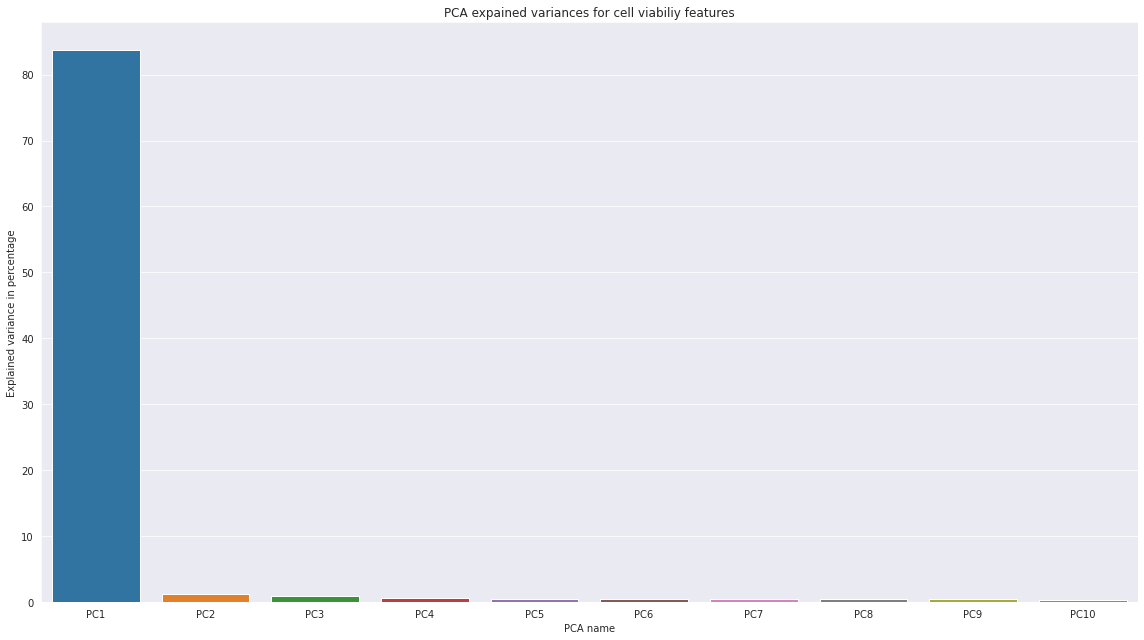

In [15]:
from sklearn.decomposition import PCA
from sklearn import preprocessing as prep

scaler = prep.StandardScaler()
scaled_cell = scaler.fit_transform(cell_viab)
pca = PCA()
pca.fit(scaled_cell)
pca_data = pca.transform(scaled_cell)
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize = (16,9))
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 2)
per_var_part = per_var[:10]
labels = ['PC' + str(x) for x in range(1, len(per_var_part) + 1)]
my_dict = dict()
for inx, i in enumerate(labels):
    my_dict[i] = per_var_part[inx]
df = pd.DataFrame(my_dict, index = [0])    
sns.barplot(data = df, tick_label = labels,ax = ax)
ax.set_title('PCA expained variances for cell viabiliy features')
ax.set_ylabel('Explained variance in percentage')
ax.set_xlabel('PCA name')
plt.tight_layout()

 <span style="color:#000000; font-family: 'Georgia'; font-size: 1.2em;">As it was expected, first principal component of cell viablity feature explains more than 80 % of variance(it was mentioned above that cell viability features are highly correlated).Meanwhile gene expression's first principal component covers only around 25 % of variance.</span>